In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
members_data = pd.read_csv(r"C:\Users\Administrator\Downloads\pcmembers_2023.csv")

In [61]:
members_data

,Session,Year,Programming Exp,Laptop,Blood Group,DataCamp Granted Date,2023 Contest Perticipated,SIM
0,2021-2022,1st year,Yes,Yes - Laptop,A+,No,NaN,GP
1,2021-2022,1st year,No,Yes - Laptop,A+,08/03/2023,NaN,Airtel
2,2020-2021,2nd year,Yes,Yes - Laptop,AB+,12/04/2023,NaN,GP
3,2020-2021,2nd year,No,Yes - Laptop,O+,18/02/2023,Yes,Robi
4,2018-2019,4th year,Yes,Yes - Laptop,A+,No,NaN,Robi
...,...,...,...,...,...,...,...,...
150,2021-2022,1st year,No,Yes - Laptop,B+,No,NaN,Blink
151,2019-2020,3rd year,Yes,Yes - Laptop,B+,08/03/2023,NaN,Robi
152,2020-2021,2nd year,Yes,Yes - Laptop,NaN,No,NaN,GP
153,2020-2021,2nd year,No,No - But planning to buy,NaN,No,NaN,Robi


In [62]:
members_data.dtypes

Session                      object
Year                         object
Programming Exp              object
Laptop                       object
Blood Group                  object
DataCamp Granted Date        object
2023 Contest Perticipated    object
SIM                          object
dtype: object

# <b>Data Cleaning & Transformation<b>

In [63]:
members_data.isnull().sum()

Session                        0
Year                           0
Programming Exp                0
Laptop                         0
Blood Group                   30
DataCamp Granted Date         24
2023 Contest Perticipated    144
SIM                            1
dtype: int64

In [64]:
members_data['Blood Group'].value_counts()

Blood Group
A+         39
O+         39
B+         32
AB+        10
B (+ve)     1
O(+)        1
A-          1
A +(ve)     1
O-          1
Name: count, dtype: int64

In [65]:
members_data.replace('B (+ve)','B+',inplace=True)
members_data.replace('A +(ve)','A+',inplace=True)
members_data.replace('O(+)','O+',inplace=True)

In [66]:
members_data['Blood Group'].value_counts()

Blood Group
A+     40
O+     40
B+     33
AB+    10
A-      1
O-      1
Name: count, dtype: int64

In [67]:
members_data['Blood Group'].replace(np.nan,'Missing Blood Group',inplace=True)

In [68]:
members_data['2023 Contest Perticipated'].replace(np.nan,'No',inplace=True)

In [69]:
members_data['2023 Contest Perticipated']

0       No
1       No
2       No
3      Yes
4       No
      ... 
150     No
151     No
152     No
153     No
154     No
Name: 2023 Contest Perticipated, Length: 155, dtype: object

In [70]:
members_data['SIM'].ffill(inplace=True)

In [71]:
#members_data['DataCamp Granted Date'].replace('No','Not Granted DataCamp',inplace=True)

In [72]:
members_data['DataCamp Granted Date']

0              No
1      08/03/2023
2      12/04/2023
3      18/02/2023
4              No
          ...    
150            No
151    08/03/2023
152            No
153            No
154            No
Name: DataCamp Granted Date, Length: 155, dtype: object

In [73]:
members_data['DataCamp Granted Date'] = pd.to_datetime(members_data['DataCamp Granted Date'],format='%d/%m/%Y',errors='coerce')

In [74]:
members_data['DataCamp Granted Date'].replace(np.nan,'Not Granted by DataCamp',inplace=True)

In [75]:
members_data['DataCamp Granted Date']

0      Not Granted by DataCamp
1          2023-03-08 00:00:00
2          2023-04-12 00:00:00
3          2023-02-18 00:00:00
4      Not Granted by DataCamp
                ...           
150    Not Granted by DataCamp
151        2023-03-08 00:00:00
152    Not Granted by DataCamp
153    Not Granted by DataCamp
154    Not Granted by DataCamp
Name: DataCamp Granted Date, Length: 155, dtype: object

In [76]:
members_data.isnull().sum()

Session                      0
Year                         0
Programming Exp              0
Laptop                       0
Blood Group                  0
DataCamp Granted Date        0
2023 Contest Perticipated    0
SIM                          0
dtype: int64

In [77]:
members_data.head()

,Session,Year,Programming Exp,Laptop,Blood Group,DataCamp Granted Date,2023 Contest Perticipated,SIM
0,2021-2022,1st year,Yes,Yes - Laptop,A+,Not Granted by DataCamp,No,GP
1,2021-2022,1st year,No,Yes - Laptop,A+,2023-03-08 00:00:00,No,Airtel
2,2020-2021,2nd year,Yes,Yes - Laptop,AB+,2023-04-12 00:00:00,No,GP
3,2020-2021,2nd year,No,Yes - Laptop,O+,2023-02-18 00:00:00,Yes,Robi
4,2018-2019,4th year,Yes,Yes - Laptop,A+,Not Granted by DataCamp,No,Robi


In [78]:
members_data['Year'].value_counts()

Year
2nd year    66
1st year    49
4th year    19
3rd year    14
Master's     7
Name: count, dtype: int64

In [79]:
members_data['Session'].value_counts()

Session
2020-2021    64
2021-2022    51
2018-2019    18
2019-2020    13
2017-2018     9
Name: count, dtype: int64

In [80]:
members_data.rename(columns={'Laptop':'Computer'},inplace=True)

In [81]:
members_data['Computer'].value_counts()

Computer
Yes - Laptop                91
No - But planning to buy    35
Yes - Desktop               13
No                          10
No - But I can manage        6
Name: count, dtype: int64

# <b>Data Representation<b>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\3370166105.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  y.set_xticklabels(y.get_xticklabels(),rotation=90)


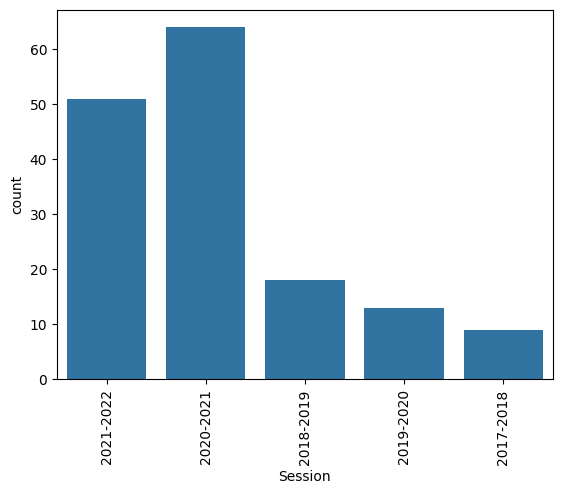

In [82]:
y=sns.countplot(x='Session',data=members_data)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\3781069104.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  y.set_xticklabels(y.get_xticklabels(),rotation=90)


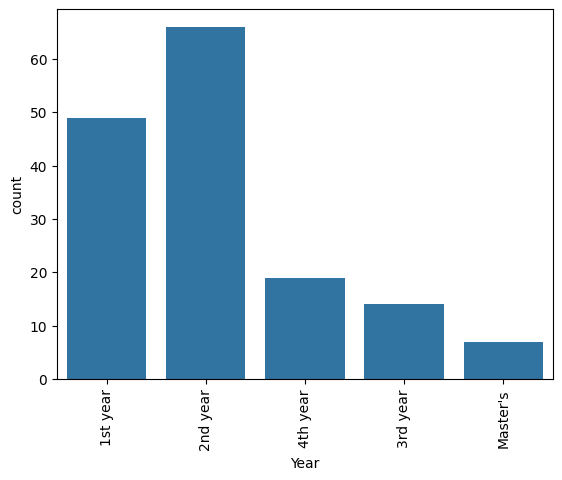

In [83]:
y=sns.countplot(x='Year',data=members_data)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\3682447786.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Programming Exp',data=members_data,palette='viridis')


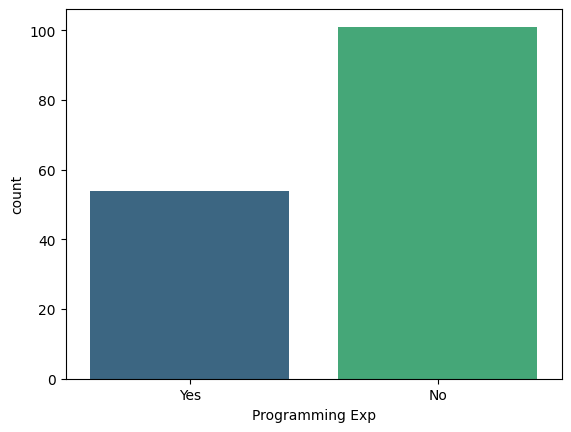

In [84]:
sns.countplot(x='Programming Exp',data=members_data,palette='viridis')
plt.show()

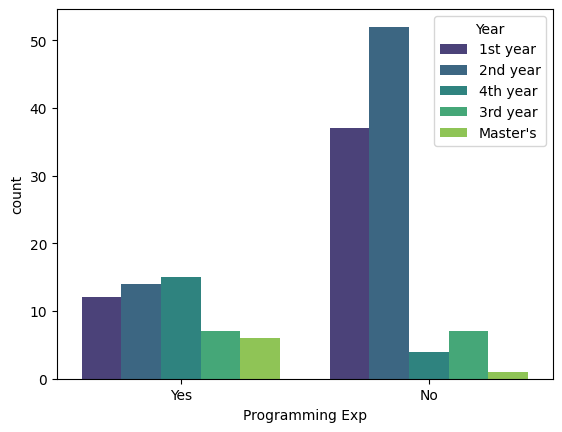

In [85]:
sns.countplot(x='Programming Exp',hue='Year',data=members_data,palette='viridis')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\1898767574.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


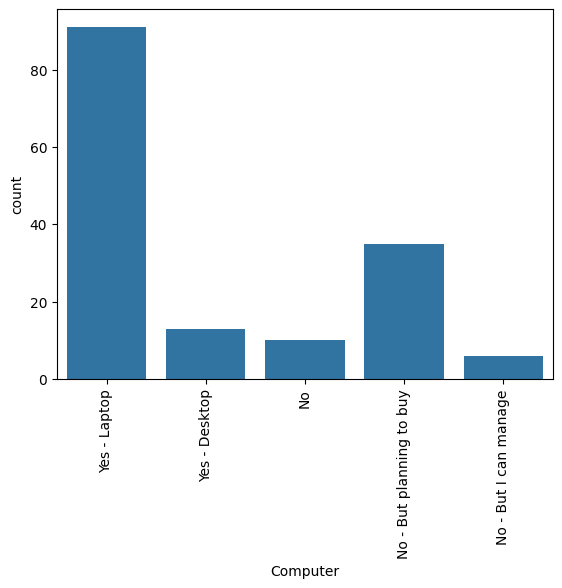

In [86]:
ordered=['Yes - Laptop','Yes - Desktop','No','No - But planning to buy','No - But I can manage']
s=sns.countplot(x='Computer',data=members_data,order=ordered)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\1366871922.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(),rotation=90)


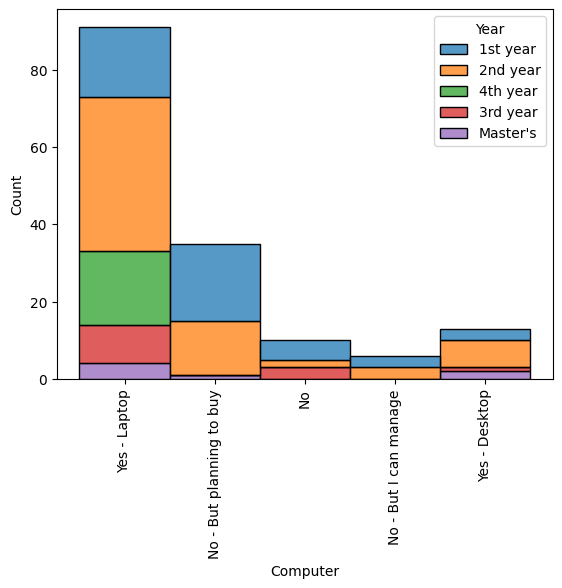

In [87]:
b=sns.histplot(x='Computer',hue='Year',data=members_data,multiple='stack')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\2974104522.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  y.set_xticklabels(y.get_xticklabels(),rotation=90)


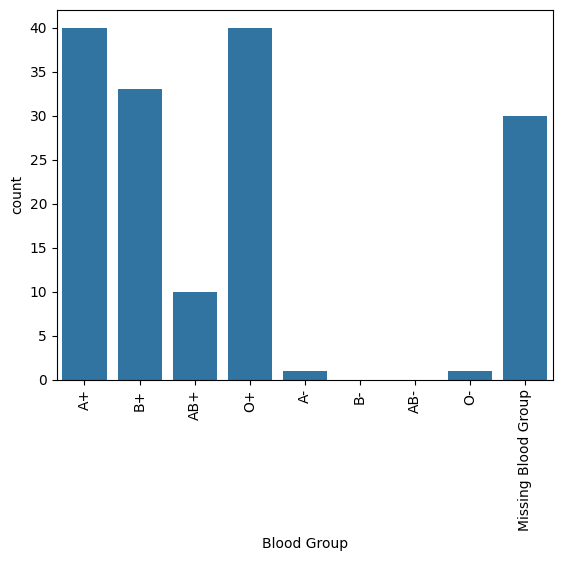

In [88]:
ordered_blood=['A+','B+','AB+','O+','A-','B-','AB-','O-','Missing Blood Group']
y=sns.countplot(x='Blood Group',data=members_data,order=ordered_blood)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

Perchantage Show

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\1645252477.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count + 1, f'{percentages[i]:.1f}%', ha='center')


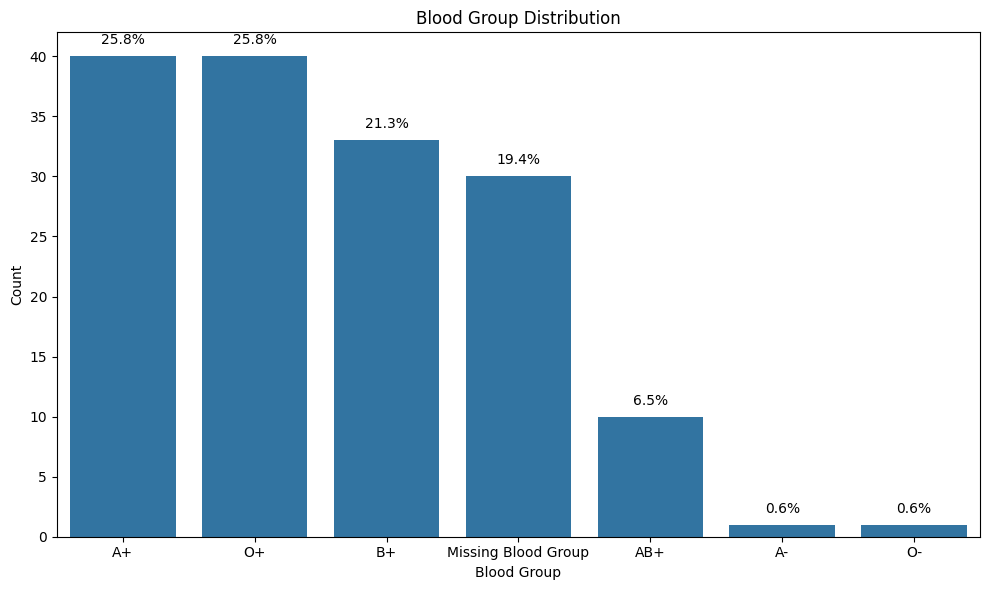

In [89]:
counts = members_data['Blood Group'].value_counts()
percentages = (counts / counts.sum()) * 100
plt.figure(figsize=(10, 6))
sns.countplot(data=members_data, x='Blood Group', order=counts.index)
plt.title('Blood Group Distribution')
plt.xlabel('Blood Group')
plt.ylabel('Count')
for i, count in enumerate(counts):
    plt.text(i, count + 1, f'{percentages[i]:.1f}%', ha='center')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\1364257751.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bg.set_xticklabels(bg.get_xticklabels(),rotation=90)


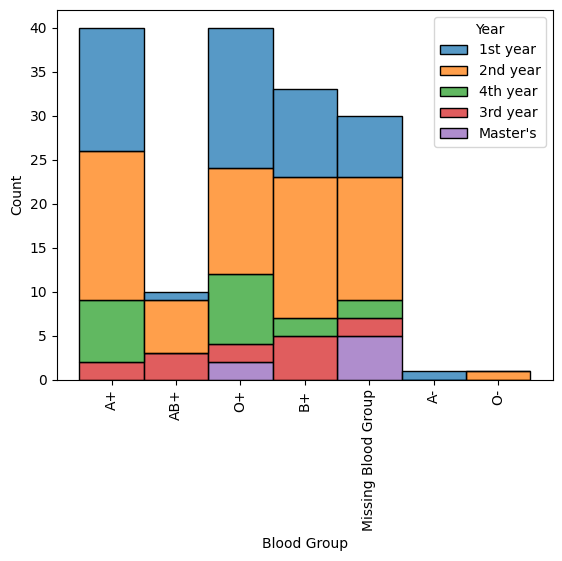

In [90]:
bg=sns.histplot(x='Blood Group',hue='Year',data=members_data,multiple='stack')
bg.set_xticklabels(bg.get_xticklabels(),rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\3361749378.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)


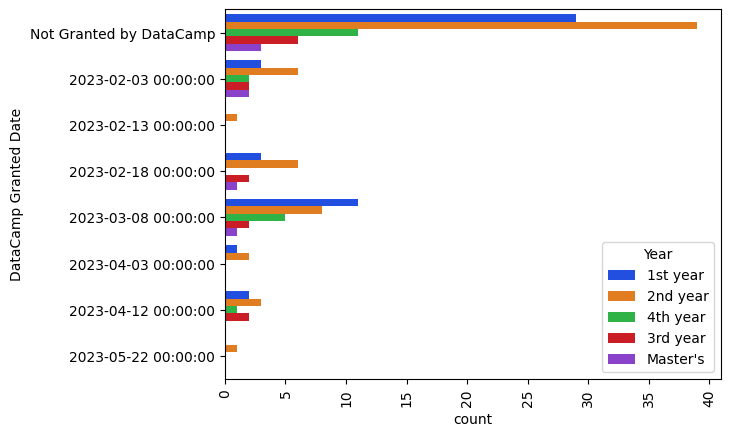

In [91]:
ordered_date=['Not Granted by DataCamp','2023-02-03 00:00:00','2023-02-13 00:00:00','2023-02-18 00:00:00','2023-03-08 00:00:00','2023-04-03 00:00:00','2023-04-12 00:00:00','2023-05-22 00:00:00']
d=sns.countplot(y='DataCamp Granted Date',hue='Year',data=members_data,palette='bright',order=ordered_date)
d.set_xticklabels(d.get_xticklabels(),rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\2704439512.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)


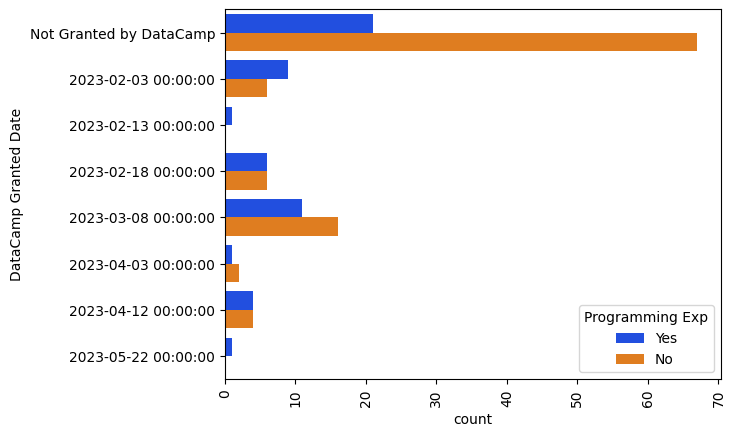

In [92]:
d=sns.countplot(y='DataCamp Granted Date',hue='Programming Exp',data=members_data,palette='bright',order=ordered_date)
d.set_xticklabels(d.get_xticklabels(),rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\4151275942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='2023 Contest Perticipated',data=members_data,palette='mako')


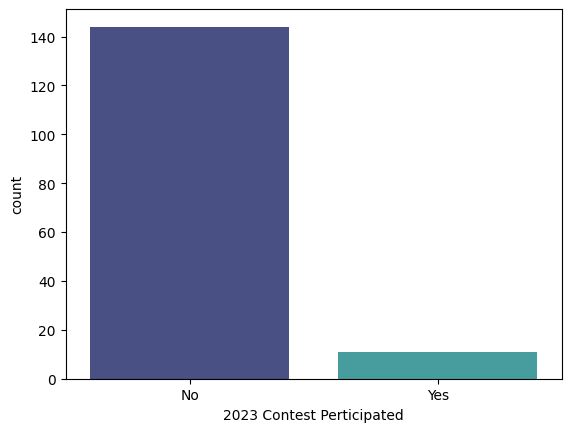

In [93]:
sns.countplot(x='2023 Contest Perticipated',data=members_data,palette='mako')
plt.show()

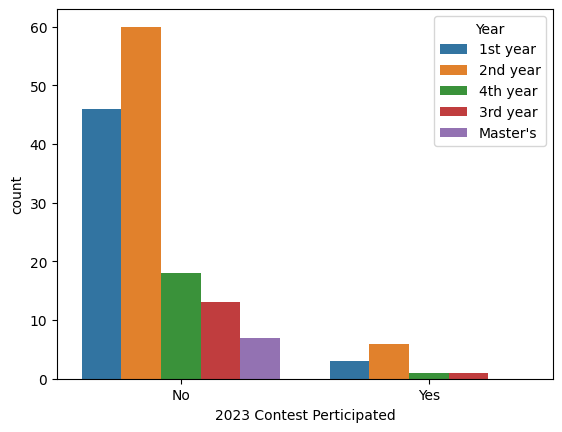

In [94]:
sns.countplot(x='2023 Contest Perticipated',hue='Year',data=members_data)
plt.show()

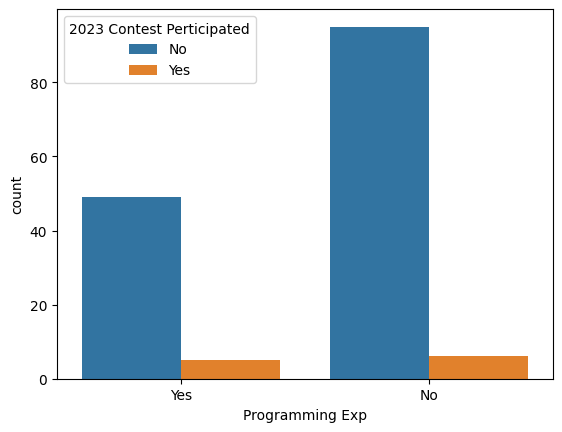

In [95]:
sns.countplot(x='Programming Exp',hue='2023 Contest Perticipated',data=members_data)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12344\3082304994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SIM',data=members_data,palette='viridis')


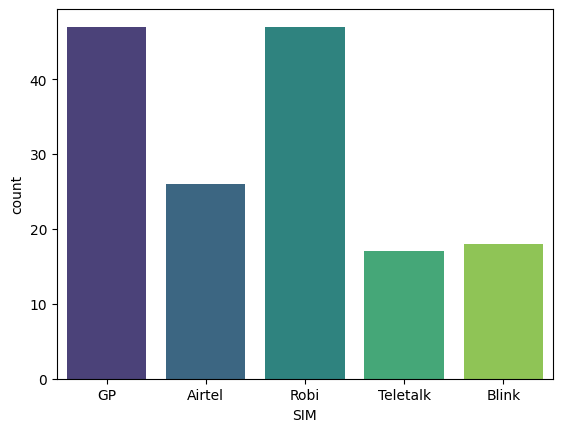

In [96]:
sns.countplot(x='SIM',data=members_data,palette='viridis')
plt.show()

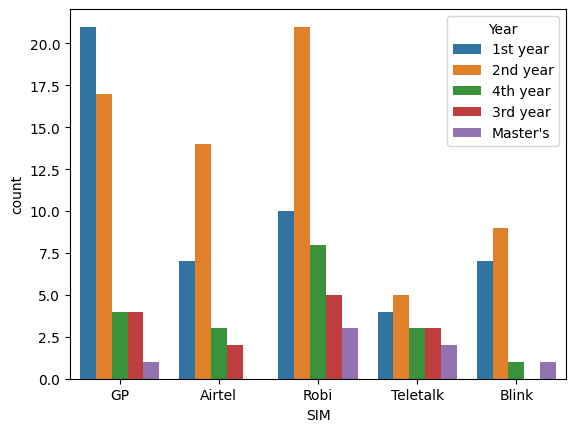

In [97]:
sns.countplot(x='SIM',hue='Year',data=members_data)
plt.show()